### Detecting contours of simple shapes and computing area and perimeter

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os


def imshow(title,image,size=10):
    w,h = image.shape[1],image.shape[0]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.title(title)
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.show()

In [3]:
def load_image(image):
    return cv.imread(os.path.join("data",image))

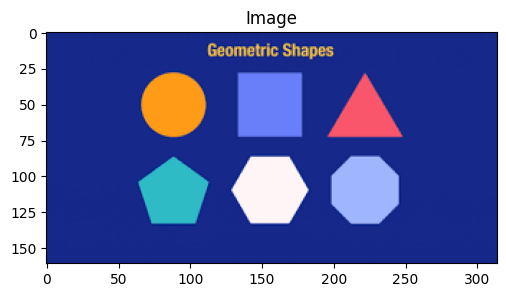

In [4]:
img = load_image('shapes.png')
imshow('Image',img,3)

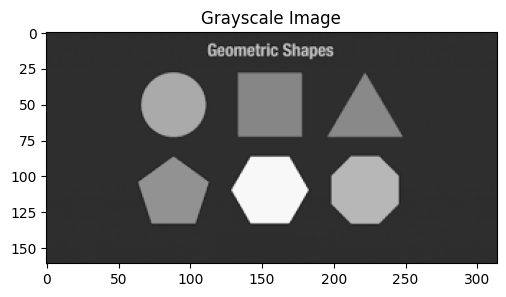

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
imshow('Grayscale Image',gray,3)


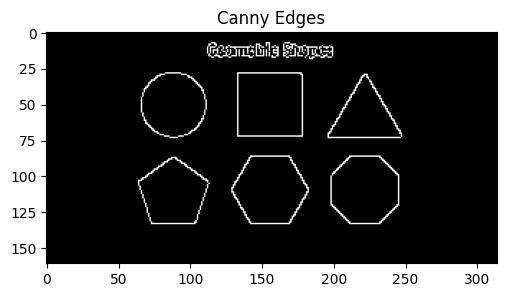

In [8]:
edged = cv.Canny(gray,30,200)
imshow('Canny Edges',edged,3)



In [ ]:
contours,heirarchy = cv.findContours(edged,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
shape_contours = sorted(contours,key=cv.contourArea,reverse=True)[:6]
print(f"Total number of contours after elimination of letters: {len(shape_contours)}\n")
print("The sorted contours are: ",shape_contours)

Total number of contours after elimination of letters: 6

The sorted contours are:  [array([[[133,  28]],

       [[133,  72]],

       [[178,  72]],

       [[178,  29]],

       [[177,  28]]], dtype=int32), array([[[142,  86]],

       [[141,  87]],

       [[141,  88]],

       [[140,  89]],

       [[140,  90]],

       [[138,  92]],

       [[138,  93]],

       [[137,  94]],

       [[137,  95]],

       [[136,  96]],

       [[136,  97]],

       [[134,  99]],

       [[134, 100]],

       [[133, 101]],

       [[133, 102]],

       [[131, 104]],

       [[131, 105]],

       [[130, 106]],

       [[130, 107]],

       [[129, 108]],

       [[129, 111]],

       [[130, 112]],

       [[130, 113]],

       [[131, 114]],

       [[131, 115]],

       [[133, 117]],

       [[133, 118]],

       [[134, 119]],

       [[134, 120]],

       [[135, 121]],

       [[135, 122]],

       [[137, 124]],

       [[137, 125]],

       [[138, 126]],

       [[138, 127]],

       [[139, 128]],


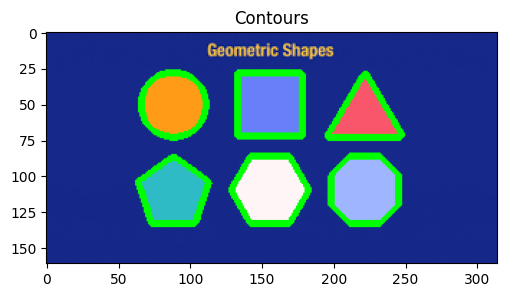

In [23]:
cv.drawContours(img,shape_contours,-1,(0,255,0),1)
imshow('Contours',img,3)

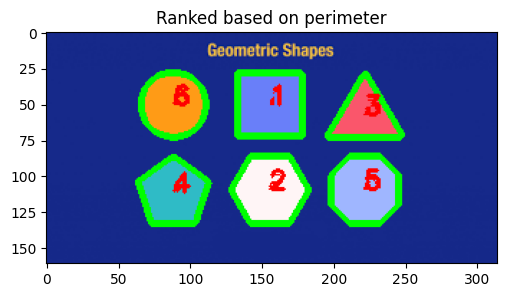

In [55]:
#Sorting based on perimeters
peri_moments = [(cv.arcLength(con,True),cv.moments(con)) for con in shape_contours]
sorted_peri_moments = sorted(peri_moments,key=lambda x:x[0],reverse=True)
for index,value in enumerate(sorted_peri_moments):
    perimter, mom = value
    cx,cy = int(mom["m10"]/mom["m00"]),int(mom["m01"]/mom["m00"])
    cv.putText(img,f"{index+1}",(cx,cy),cv.FONT_HERSHEY_PLAIN,0.5,(0,0,255),1)

imshow('Ranked based on perimeter',img,3)

    